In [1]:
cd  /Users/driscoll/Documents/GitHub/fnc/matlab
FNC_init

[**Demo %s**](#demo-traffic-advection)


 In the following definition we allow the velocity $c$ to be specified as a parameter.

In [2]:
[x, Dx, Dxx] = diffper(300, [-4, 4]);
f = @(t, u, c) -c * (Dx*u);
ivp = ode(ODEFcn=f);
ivp.Parameters = 2;
ivp.InitialTime = 0;
ivp.RelativeTolerance = 1e-5;

The following initial condition isn't mathematically periodic, but the deviation is less than machine precision. We specify RK4 as the solver.

In [3]:
u_init = 1 + exp(-3*x.^2);
ivp.InitialValue = u_init;
t = linspace(0, 3, 201);
sol = solve(ivp, t);
U = sol.Solution;

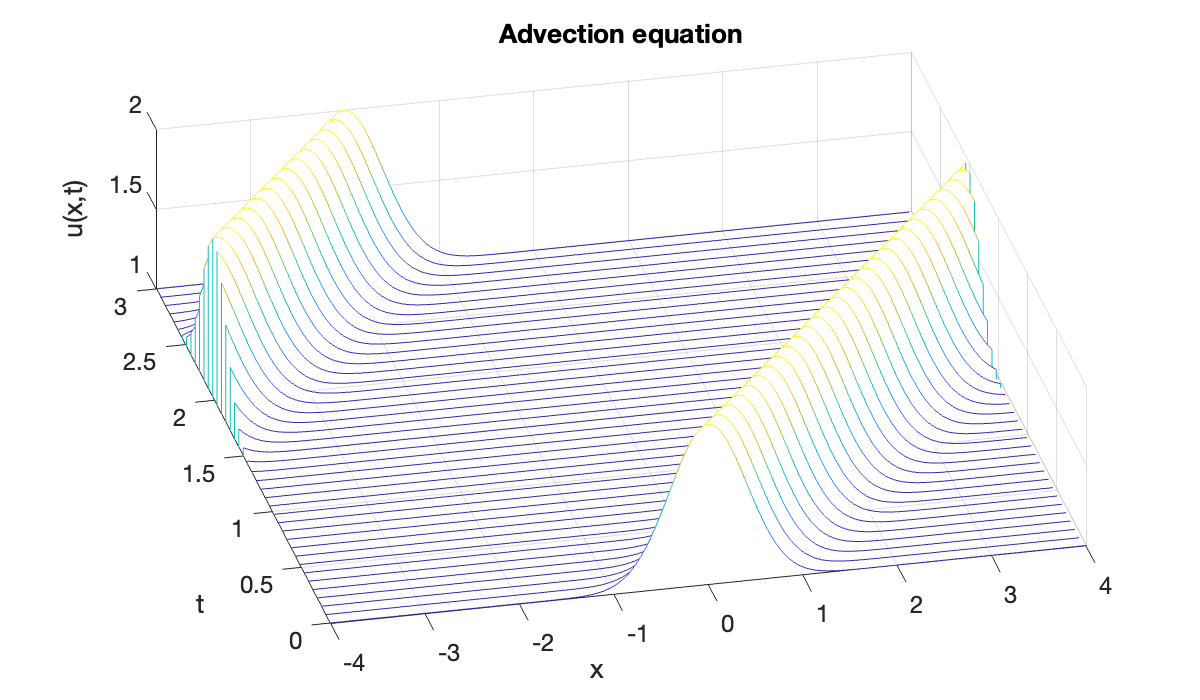

In [4]:
waterfall(x, t(1:5:end), U(:, 1:5:end)')
view(-13, 65)
xlabel('x'), ylabel('t'), zlabel('u(x,t)')
title('Advection equation') 

An animation shows the solution nicely. The bump moves with speed 2 to the right, reentering on the left as it exits to the right because of the periodic conditions.

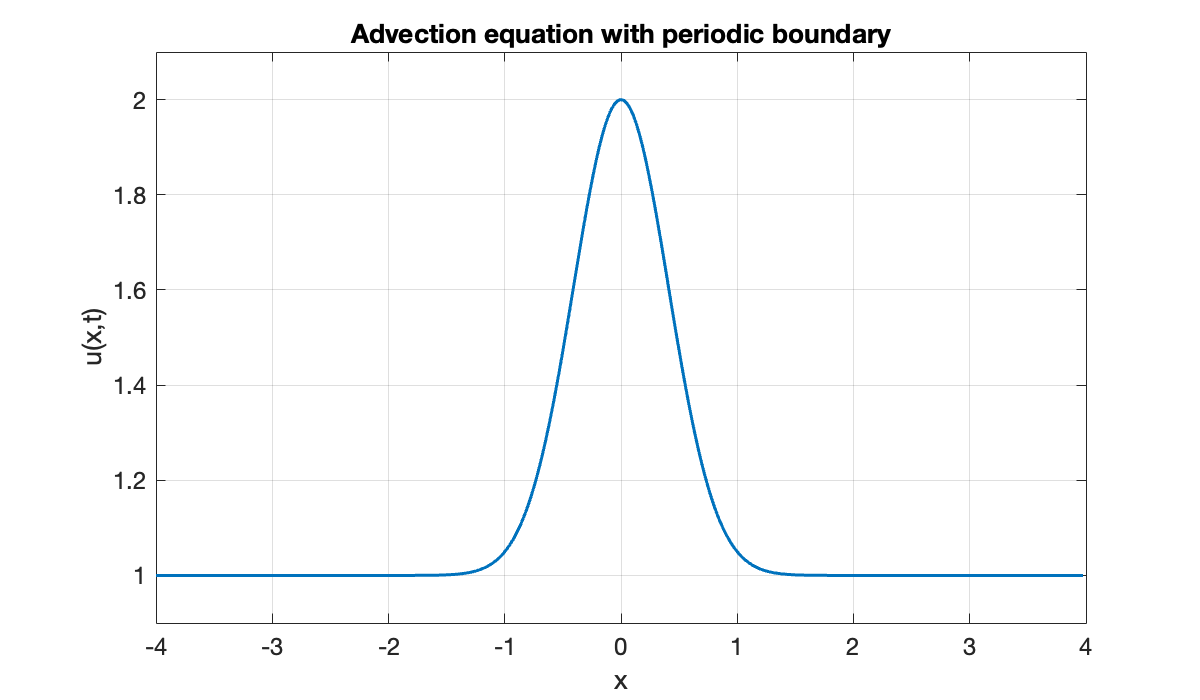

In [5]:
clf
plot(x, U(:, 1))
hold on,  grid on
axis([-4, 4, 0.9, 2.1])
title('Advection equation with periodic boundary') 
xlabel('x'),  ylabel('u(x,t)')
vid = VideoWriter("advection-periodic.mp4","MPEG-4");
vid.Quality = 85;
open(vid);
for frame = 1:length(t)
    cla, plot(x, U(:, frame))
    str = sprintf("t = %.2f", t(frame));
    text(-3.5, 1.9, str);
    writeVideo(vid, frame2im(getframe(gcf)));
end
close(vid)
close(gcf)